# Machine Learning con Python

Carichiamo i dati del famaso dataset iris.

Citazione
Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76. This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. https://creativecommons.org/licenses/by/4.0/legalcode

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris=sns.load_dataset("iris")

In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#se non hai installato seaborn
iris = pd.read_csv(filepath_or_buffer=r"C:\Users\ianto\Desktop\Corso Python\file\iris.csv",
                  header=1)

Diamo preliminarmente un'occhiata ai dati

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Partiamo con una lista contenente i valori di un nuovo iris

In [6]:
nuovo_iris = [4.3, 3.2, 1.4, 0.3]

In [7]:
#Osservazione: su python posso valorizzare più variabili contemporneamente con questa sintassi
#x, y, z, w = 4.3, 3.2, 1.4, 0.3

Creiamo una colonna distanza

In [8]:
iris["distanza"] = np.sqrt( (iris["sepal_length"]-nuovo_iris[0])**2 + \
                            (iris["sepal_width"]-nuovo_iris[1])**2 + \
                            (iris["petal_length"]-nuovo_iris[2])**2 + \
                            (iris["petal_width"]-nuovo_iris[3])**2) 

Ordiniam i valori dello storico per distanza e prendiamo l'iris più vicino

In [9]:
iris.sort_values(by="distanza", ascending = True).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,distanza
42,4.4,3.2,1.3,0.2,setosa,0.173205


Cerhiamo di generalizzare la procedura per avere dei dati sull'accuratezza aspettata.

Divido il dataset in un 70% di training e un 30% di test

In [10]:
training = iris.sample(frac=0.7, random_state=0)

In [11]:
training.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,distanza
114,5.8,2.8,5.1,2.4,virginica,4.528797
62,6.0,2.2,4.0,1.0,versicolor,3.337664
33,5.5,4.2,1.4,0.2,setosa,1.565248
107,7.3,2.9,6.3,1.8,virginica,5.945587
7,5.0,3.4,1.5,0.2,setosa,0.741620


Per prendere il 30% restante, cancello da iris le righe con l'indice presente nel training

In [12]:
test = iris.drop(training.index)

In [13]:
test.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,distanza
0,5.1,3.5,1.4,0.2,setosa,0.860233
9,4.9,3.1,1.5,0.1,setosa,0.648074
14,5.8,4.0,1.2,0.2,setosa,1.714643
19,5.1,3.8,1.5,0.3,setosa,1.004988
21,5.1,3.7,1.5,0.4,setosa,0.953939


Implementiamo l'algoritmo di classificazione k-neighbours con k=1. Per prima cosa facciamo diventare l'indice di test una colonna, in modo da usarlo come identificativo.

In [14]:
test = test.reset_index()

In [15]:
test.head(5)

,index,sepal_length,sepal_width,petal_length,petal_width,species,distanza
0,0,5.1,3.5,1.4,0.2,setosa,0.860233
1,9,4.9,3.1,1.5,0.1,setosa,0.648074
2,14,5.8,4.0,1.2,0.2,setosa,1.714643
3,19,5.1,3.8,1.5,0.3,setosa,1.004988
4,21,5.1,3.7,1.5,0.4,setosa,0.953939


Eseguiamo una cross merge di test e training

In [16]:
merge = pd.merge(test,
         training,
         how="cross",
         suffixes= ("_test","_training")    
      )

Guardiamo il nuovo Dataset

In [17]:
merge.head(5)

,index,sepal_length_test,sepal_width_test,petal_length_test,petal_width_test,species_test,distanza_test,sepal_length_training,sepal_width_training,petal_length_training,petal_width_training,species_training,distanza_training
0,0,5.1,3.5,1.4,0.2,setosa,0.860233,5.8,2.8,5.1,2.4,virginica,4.528797
1,0,5.1,3.5,1.4,0.2,setosa,0.860233,6.0,2.2,4.0,1.0,versicolor,3.337664
2,0,5.1,3.5,1.4,0.2,setosa,0.860233,5.5,4.2,1.4,0.2,setosa,1.565248
3,0,5.1,3.5,1.4,0.2,setosa,0.860233,7.3,2.9,6.3,1.8,virginica,5.945587
4,0,5.1,3.5,1.4,0.2,setosa,0.860233,5.0,3.4,1.5,0.2,setosa,0.741620


In [18]:
merge.tail(5)

,index,sepal_length_test,sepal_width_test,petal_length_test,petal_width_test,species_test,distanza_test,sepal_length_training,sepal_width_training,petal_length_training,petal_width_training,species_training,distanza_training
4720,145,6.7,3.0,5.2,2.3,virginica,4.923413,4.4,3.0,1.3,0.2,setosa,0.264575
4721,145,6.7,3.0,5.2,2.3,virginica,4.923413,5.4,3.9,1.7,0.4,setosa,1.341641
4722,145,6.7,3.0,5.2,2.3,virginica,4.923413,5.5,2.3,4.0,1.3,versicolor,3.163858
4723,145,6.7,3.0,5.2,2.3,virginica,4.923413,6.8,3.2,5.9,2.3,virginica,5.522681
4724,145,6.7,3.0,5.2,2.3,virginica,4.923413,7.6,3.0,6.6,2.1,virginica,6.419502


Testiamo le dimensioni

In [19]:
len(training),len(test),len(merge)

(105, 45, 4725)

Creiamo una colonna che calcoli la distanza tra i dati di traning e quelli di test

In [20]:
merge["distanza"] = pow( pow(merge["sepal_length_training"]-merge["sepal_length_test"],2)+
                         pow(merge["sepal_width_training"]-merge["sepal_width_test"],2)+
                         pow(merge["petal_length_training"]-merge["petal_length_test"],2)+
                         pow(merge["petal_width_training"]-merge["petal_width_test"],2) ,
                        0.5)

Cerchiamo l'iris del training più vicino all'iris di test con index 0

In [21]:
merge.query("index == 0").sort_values(by="distanza",ascending=True).head(1)

,index,sepal_length_test,sepal_width_test,petal_length_test,petal_width_test,species_test,distanza_test,sepal_length_training,sepal_width_training,petal_length_training,petal_width_training,species_training,distanza_training,distanza
99,0,5.1,3.5,1.4,0.2,setosa,0.860233,5.1,3.5,1.4,0.3,setosa,0.8544,0.1


Ordiniamo i dati per distanza crescente e rimuoviamo i duplicati per la colonna index mantenendo il primo elemento. In questo modo avremo per ogni riga di test la riga di training più vicina

In [22]:
predizioni = merge.sort_values(by="distanza",ascending=True).drop_duplicates(subset=["index"], keep = "first")
predizioni.head(5)

,index,sepal_length_test,sepal_width_test,petal_length_test,petal_width_test,species_test,distanza_test,sepal_length_training,sepal_width_training,petal_length_training,petal_width_training,species_training,distanza_training,distanza
4577,142,5.8,2.7,5.1,1.9,virginica,4.330127,5.8,2.7,5.1,1.9,virginica,4.330127,0.000000
1474,39,5.1,3.4,1.5,0.2,setosa,0.836660,5.0,3.4,1.5,0.2,setosa,0.741620,0.100000
99,0,5.1,3.5,1.4,0.2,setosa,0.860233,5.1,3.5,1.4,0.3,setosa,0.854400,0.100000
901,29,4.7,3.2,1.6,0.2,setosa,0.458258,4.8,3.1,1.6,0.2,setosa,0.556776,0.141421
2993,81,5.5,2.4,3.7,1.0,versicolor,2.803569,5.5,2.4,3.8,1.1,versicolor,2.912044,0.141421


Calcoliamo il numero di errori

In [23]:
predizioni.query("species_test != species_training")

,index,sepal_length_test,sepal_width_test,petal_length_test,petal_width_test,species_test,distanza_test,sepal_length_training,sepal_width_training,petal_length_training,petal_width_training,species_training,distanza_training,distanza
2343,70,5.9,3.2,4.8,1.8,versicolor,4.045986,6.1,3.0,4.9,1.8,virginica,4.216634,0.300000
2470,72,6.3,2.5,4.9,1.5,versicolor,4.263801,6.3,2.8,5.1,1.5,virginica,4.392038,0.360555


Calcoliamo l'accuratezza

In [24]:
len(predizioni.query("species_test == species_training"))/len(predizioni)

0.9555555555555556

# Ripetiamo il procedimento con scikit-learn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import seaborn as sns

Importiamo il dataset iris

In [26]:
iris=sns.load_dataset("iris")

In [27]:
#se non hai installato seaborn
iris = pd.read_csv(filepath_or_buffer=r"C:\Users\ianto\Desktop\Corso Python\file\iris.csv",
                  header=1)

Ripassiamo come si "elimina" una colonna

In [28]:
iris.drop("species", axis=1).head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Dividiamo i dati in training e test utilizzando from il metodo train_test_split di scikit-learn

In [29]:
features_training,features_test, target_training, target_test = train_test_split(iris.drop("species", axis=1),
                                                                   iris[["species"]],
                                                                   test_size = 0.3,
                                                                   shuffle = True,
                                                                   random_state = 1)

Guardiamo i quattro dataset

In [30]:
features_training.head(5)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [31]:
target_training.head(5)

,species
118,virginica
18,setosa
4,setosa
45,setosa
59,versicolor


In [32]:
features_test.head(5)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [33]:
target_test.head(5)

,species
14,setosa
98,versicolor
75,versicolor
16,setosa
131,virginica


Istanziamo l'algoritmo K-Neighbours tramite scikit-learn

In [34]:
knc = KNeighborsClassifier(n_neighbors=1)

Alleniamolo soltanto sui dati di training tramite il metodo fit

In [35]:
#per eliminare il warning usare target_training.values.ravel()
knc.fit(features_training,target_training)

C:\Users\ianto\Desktop\ambiente_python\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

Utilizziamo il metodo allenato per calcolare le predizioni sui dati di test tramite il metodo predict

In [36]:
predizioni = knc.predict(features_test)
predizioni

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

Con il metodo score posso calcolare quante di queste predizioni sono corrette

In [37]:
score = knc.score(features_test,target_test)
score

0.9777777777777777

Ricreiamo il dataset features_test aggiungendo i valori delle classi reali e predette

In [38]:
iris_completo = features_test.copy()
iris_completo["species_originale"]=target_test["species"]
iris_completo["species_predetta"]=predizioni
iris_completo.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species_originale,species_predetta
14,5.8,4.0,1.2,0.2,setosa,setosa
98,5.1,2.5,3.0,1.1,versicolor,versicolor
75,6.6,3.0,4.4,1.4,versicolor,versicolor
16,5.4,3.9,1.3,0.4,setosa,setosa
131,7.9,3.8,6.4,2.0,virginica,virginica


Vediamo gli errori

In [39]:
iris_completo.query("species_originale != species_predetta")

,sepal_length,sepal_width,petal_length,petal_width,species_originale,species_predetta
119,6.0,2.2,5.0,1.5,virginica,versicolor


Calcoliamo di nuovo l'accuratezza "manualmente"

In [40]:
len(iris_completo.query("species_originale == species_predetta"))/len(iris_completo)

0.9777777777777777

Calcoliamo la matrice di confusione

In [41]:
confusion_matrix(target_test, predizioni)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

Graficamente

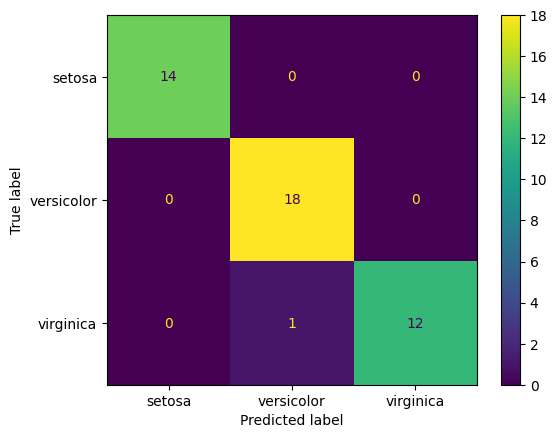

In [42]:
ConfusionMatrixDisplay.from_predictions(target_test, predizioni)

## Utilizziamo altri algoritmi di Machine Learning ed estendiamo il processo di lavorazione dei dati

In [43]:
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import seaborn as sns

Reimportiamo il dataset e dividiamo i dati in training e test (random_state = 0 ci garantisce di avere gli stessi dati di prima)

In [44]:
iris=sns.load_dataset("iris")

In [45]:
features_training,features_test, target_training, target_test = train_test_split(iris.drop("species", axis=1),
                                                                   iris[["species"]],
                                                                   test_size = 0.3,
                                                                   shuffle = True,
                                                                   random_state = 1)

Valorizziamo i valori mancanti. Partiamo istanziando la classe SimpleImputer di Scikit-learn

In [46]:
imputer = SimpleImputer(strategy='mean')

Alleniamo l'oggetto imputer sui dati di training

In [47]:
imputer.fit(features_training)

SimpleImputer()

Utilizziamo il metodo allenato per trasformare i dati di training e di test

In [48]:
features_training_imputed = pd.DataFrame(
    imputer.transform(features_training),
    columns=features_training.columns,
    index=features_training.index
)

In [49]:
features_training_imputed.head(5)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [50]:
features_test_imputed = pd.DataFrame(
    imputer.transform(features_test),
    columns=features_test.columns,
    index=features_test.index
)

In [51]:
features_test_imputed.head(5)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


Applichiamo la normalizzazione dei dati. Partiamo istanziando la classe StandardScaler di Scikit-learn

In [52]:
scaler = StandardScaler() 

Alleniamo l'oggetto sui dati di training

In [53]:
scaler.fit(features_training_imputed)

StandardScaler()

Utilizziamo il metodo allenato per trasformare i dati di training e di test

In [54]:
features_training_standard = pd.DataFrame(
    scaler.transform(features_training_imputed),
    columns=features_training_imputed.columns,
    index=features_training_imputed.index
)

In [55]:
features_training_standard.head(5)

,sepal_length,sepal_width,petal_length,petal_width
118,2.260502,-1.050897,1.776229,1.423710
18,-0.118974,1.827647,-1.144919,-1.142634
4,-0.951790,1.347889,-1.313447,-1.270951
45,-1.189738,-0.091382,-1.313447,-1.142634
59,-0.713843,-0.811018,0.090951,0.268855


In [56]:
features_test_standard = pd.DataFrame(
    scaler.transform(features_test_imputed),
    columns=features_test_imputed.columns,
    index=features_test_imputed.index
)

In [57]:
features_test_standard.head(5)

,sepal_length,sepal_width,petal_length,petal_width
14,0.000000,2.307404,-1.425798,-1.270951
98,-0.832816,-1.290775,-0.414632,-0.116096
75,0.951790,-0.091382,0.371831,0.268855
16,-0.475895,2.067525,-1.369623,-1.014317
131,2.498449,1.827647,1.495350,1.038758


Applichiamo un altro algoritmo di Machine Learning: il Perceptron. Istanziamo la classe relativa da scikit-learn

In [58]:
pcp = Perceptron(random_state = 0, alpha=0.001)

Alleniamola soltanto sui dati di training

In [59]:
#per eliminare il warning usare target_training.values.ravel()
pcp.fit(features_training_standard,target_training )

C:\Users\ianto\Desktop\ambiente_python\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.001)

Utilizziamo il metodo allenato per calcolare le predizioni sui dati di test

In [60]:
predizioni = pcp.predict(features_test_standard)
predizioni

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype='<U10')

Con il metodo score posso calcolare quante di queste predizioni sono corrette

In [61]:
score = pcp.score(features_test_standard,target_test)
score

0.8888888888888888

Ricreiamo il dataset features_test aggiungendo i valori delle classi reali e predette

In [62]:
iris_completo = features_test.copy()
iris_completo["species_originale"]=target_test["species"]
iris_completo["species_predetta"]=predizioni
iris_completo.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species_originale,species_predetta
14,5.8,4.0,1.2,0.2,setosa,setosa
98,5.1,2.5,3.0,1.1,versicolor,versicolor
75,6.6,3.0,4.4,1.4,versicolor,versicolor
16,5.4,3.9,1.3,0.4,setosa,setosa
131,7.9,3.8,6.4,2.0,virginica,virginica


In [63]:
iris_completo.query("species_originale != species_predetta")

,sepal_length,sepal_width,petal_length,petal_width,species_originale,species_predetta
56,6.3,3.3,4.7,1.6,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica
146,6.3,2.5,5.0,1.9,virginica,versicolor
108,6.7,2.5,5.8,1.8,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor


Calcoliamo di nuovo l'accuratezza "manualmente"

In [64]:
len(iris_completo.query("species_originale == species_predetta"))/len(iris_completo)

0.8888888888888888

Calcoliamo la matrice di confusione

In [65]:
confusion_matrix(target_test, predizioni)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  3, 10]])

Graficamente

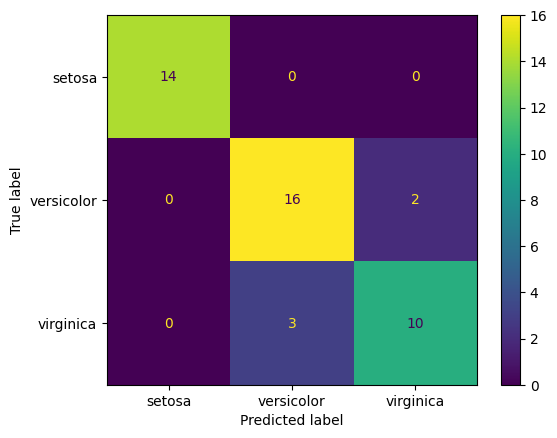

In [66]:
ConfusionMatrixDisplay.from_predictions(target_test, predizioni)

## Pipeline con scikit-learn

Invece di eseguire manualmente i singoli passi dell'algoritmo di Machine Learning, possiamo inglobarli all'interno di una pipeline di scikit-learn

In [67]:
from sklearn.pipeline import Pipeline

Reimportiamo i dati e applichiamo la divisione in training e test

In [68]:
iris=sns.load_dataset("iris")

In [69]:
features_training,features_test, target_training, target_test = train_test_split(iris.drop("species", axis=1),
                                                                   iris[["species"]],
                                                                   test_size = 0.3,
                                                                   random_state = 1)

Creiamo la pipeline

In [70]:
my_first_pipeline = Pipeline([('si',SimpleImputer(strategy='mean')),
                              ('st',StandardScaler()),
                              ('ml', Perceptron(random_state = 0))
                               ])

Alleniamo la pipeline sui dati di training

In [71]:
#per eliminare il warning usare target_training.values.ravel()
my_first_pipeline.fit(features_training,target_training)

C:\Users\ianto\Desktop\ambiente_python\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('si', SimpleImputer()), ('st', StandardScaler()),
                ('ml', Perceptron())])

Calcoliamo le predizioni sui dati di test

In [72]:
predizioni = my_first_pipeline.predict(features_test)
predizioni

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype='<U10')

Valutiamo lo score

In [73]:
my_first_pipeline.score(features_test,target_test)

0.8888888888888888

Creo il dataset completo di dati reali e predizioni

In [74]:
iris_completo = features_test.copy()
iris_completo["species_originale"]=target_test["species"]
iris_completo["species_predetta"]=predizioni
iris_completo.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species_originale,species_predetta
14,5.8,4.0,1.2,0.2,setosa,setosa
98,5.1,2.5,3.0,1.1,versicolor,versicolor
75,6.6,3.0,4.4,1.4,versicolor,versicolor
16,5.4,3.9,1.3,0.4,setosa,setosa
131,7.9,3.8,6.4,2.0,virginica,virginica


calcoliamo di nuovo manualmente lo score

In [75]:
len(iris_completo.query("species_originale == species_predetta"))/len(iris_completo)

0.8888888888888888

Creiamo una nuova pipeline con un algoritmo diverso di Machine Learning, l'albero di decisione

In [76]:
my_second_pipeline = Pipeline([('si',SimpleImputer(strategy='mean')),
                              ('st',StandardScaler()),
                              ('ml', DecisionTreeClassifier(random_state = 0))
                               ])

Alleno la pipeline e calcolo le accuratezze

In [77]:
my_second_pipeline.fit(features_training,target_training)

Pipeline(steps=[('si', SimpleImputer()), ('st', StandardScaler()),
                ('ml', DecisionTreeClassifier(random_state=0))])

In [78]:
predizioni = my_second_pipeline.predict(features_test)

In [79]:
confusion_matrix(target_test, predizioni)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

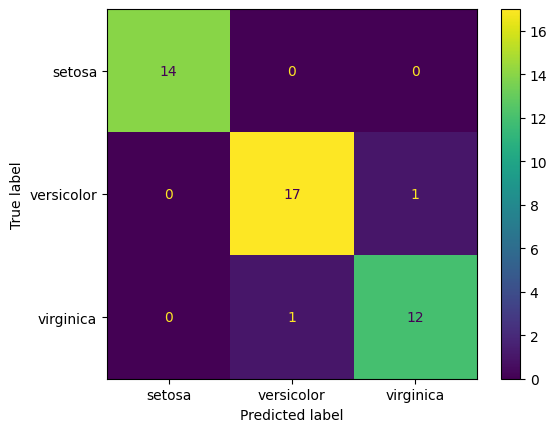

In [80]:
ConfusionMatrixDisplay.from_predictions(target_test, predizioni)

In [81]:
my_second_pipeline.score(features_test,target_test)

0.9555555555555556

Posso concludere che questo secondo algoritmo performa meglio del primo? 

No, perché potrebbe dalla particolare suddivisione dei dati in training e test. Ho bisogno di un metodo di confronto più robusto

Prima un piccolo approfondimento sui decision tree

In [82]:
from sklearn.tree import plot_tree

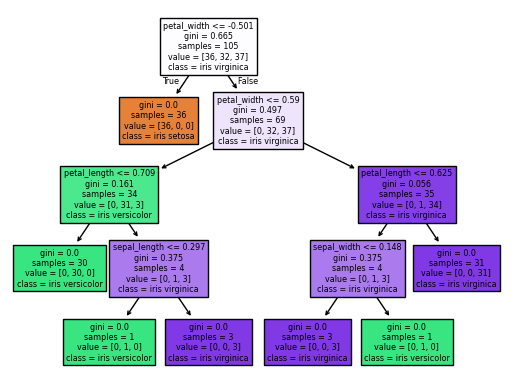

In [83]:
plot_tree(decision_tree = my_second_pipeline.steps[2][1],          
          feature_names = ["sepal_length","sepal_width","petal_length","petal_width"],
          class_names = ['iris setosa', 'iris versicolor', 'iris virginica'],
          filled = True
         );

## Convalida incrociata

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Guardiamo i "parametri" della pipeline

In [85]:
my_second_pipeline.get_params()

{'memory': None,
 'steps': [('si', SimpleImputer()),
  ('st', StandardScaler()),
  ('ml', DecisionTreeClassifier(random_state=0))],
 'transform_input': None,
 'verbose': False,
 'si': SimpleImputer(),
 'st': StandardScaler(),
 'ml': DecisionTreeClassifier(random_state=0),
 'si__add_indicator': False,
 'si__copy': True,
 'si__fill_value': None,
 'si__keep_empty_features': False,
 'si__missing_values': nan,
 'si__strategy': 'mean',
 'st__copy': True,
 'st__with_mean': True,
 'st__with_std': True,
 'ml__ccp_alpha': 0.0,
 'ml__class_weight': None,
 'ml__criterion': 'gini',
 'ml__max_depth': None,
 'ml__max_features': None,
 'ml__max_leaf_nodes': None,
 'ml__min_impurity_decrease': 0.0,
 'ml__min_samples_leaf': 1,
 'ml__min_samples_split': 2,
 'ml__min_weight_fraction_leaf': 0.0,
 'ml__monotonic_cst': None,
 'ml__random_state': 0,
 'ml__splitter': 'best'}

Possiamo assegnare ad alcuni di questi parametri più valori differenti.

In [86]:
parametri_griglia = [{"st":[StandardScaler(),MinMaxScaler()],
                      "ml":[DecisionTreeClassifier(random_state=0),LogisticRegression(random_state=0),RandomForestClassifier(random_state=0)]
                        }]

Creiamo la griglia per eseguire la convalida incrociata tramite il metodo GridSearchCV di scikit-learn

In [87]:
my_grid = GridSearchCV(estimator = my_second_pipeline,
                      param_grid = parametri_griglia,
                      cv = 5)

Alleno la griglia sui dataset di training. Eseguirò 2x2x5=20 esecuzioni, per 4 combinazioni diverse di parametri.

Fissata una combinazione di valori della griglia (ad esempio StandardScaler e DecisionTreeClassifier), eseguirò la pipeline su 5 diverse suddivisioni del dataset di training. 

Per ognuna delle 5, eseguiro il training sul 80% dei dati e valuterò l'accuratezza sul restante 20% di convalida.

In [88]:
#per eliminare il warning usare target_training.values.ravel()
my_grid.fit(features_training,target_training.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('si', SimpleImputer()),
                                       ('st', StandardScaler()),
                                       ('ml',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid=[{'ml': [DecisionTreeClassifier(random_state=0),
                                 LogisticRegression(random_state=0),
                                 RandomForestClassifier(random_state=0)],
                          'st': [StandardScaler(), MinMaxScaler()]}])

Visualizziamo lo score più alto raggiunto tra le 4 combinazioni

In [89]:
my_grid.best_score_

np.float64(0.9523809523809523)

Vediamo la combinazione per la quale ho ottenuto i valori migliori

In [90]:
my_grid.best_params_

{'ml': DecisionTreeClassifier(random_state=0), 'st': StandardScaler()}

Creo la pipeline associata alla migliore combinazione

In [91]:
best_pipeline = my_grid.best_estimator_
best_pipeline

Pipeline(steps=[('si', SimpleImputer()), ('st', StandardScaler()),
                ('ml', DecisionTreeClassifier(random_state=0))])

A questo punto ho selezionato il modello migliore.

Per valutare l'accuratezza, rialleno la pipeline su tutti i dati di training e poi calcolo l'accuratezza sui dati di test

In [92]:
best_pipeline.fit(features_training,target_training)

Pipeline(steps=[('si', SimpleImputer()), ('st', StandardScaler()),
                ('ml', DecisionTreeClassifier(random_state=0))])

In [93]:
best_pipeline.score(features_test,target_test)

0.9555555555555556

Gli alberi decisionali possono essere rappresentati graficamente!

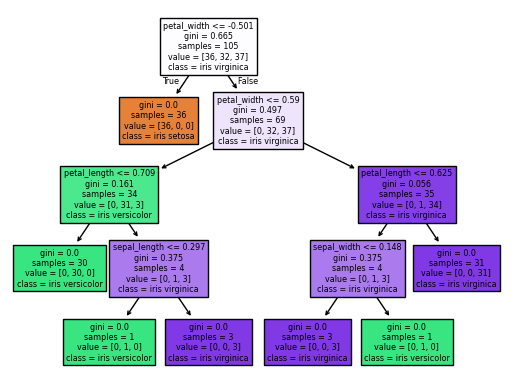

In [94]:
plot_tree(decision_tree = best_pipeline.steps[2][1],          
          feature_names = ["sepal_length","sepal_width","petal_length","petal_width"],
          class_names = ['iris setosa', 'iris versicolor', 'iris virginica'],
          filled = True
         );

In [95]:
best_pipeline.steps[2][1]

DecisionTreeClassifier(random_state=0)

## Regressione

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

Importiamo il dataset diamonds

Hadley Wickham. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York, 2016. ISBN: 978-3-319-24277-4. Disponibile online: https://ggplot2.tidyverse.org

In [97]:
diamonds=sns.load_dataset("diamonds")

In [98]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


features:
- carat peso del diamante
- cut è la qualità del taglio secondo questa scala Fair, Good, Very Good, Premium, Ideal
- color riguarda il colore secondo questa scala J, I, H, G, F, E, D 
- clarity la chiarezza secondo questa scala I3, I2, I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF, FL
- depth altezza in percentuale
- table larghezza in percentuale
- x lunghezza in millimetri
- y largheza in millimetri
- z prodonfita in millimetri

target:
- price

Codifichiamo le variabili non quantitative (sono comunque tutte ordinali).

In [99]:
codifica_cut = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
codifica_color = {"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}
codifica_clarity = {"I3":1, "I2": 2, "I1":3, "SI2":4, "SI1":5, "VS2":6, "VS1":7, "VVS2":8, "VVS1":9, "IF":10, "FL":11}

In [100]:
diamonds["cut"] = diamonds["cut"].map(codifica_cut).astype("int64")
diamonds["color"] = diamonds["color"].map(codifica_color).astype("int64")
diamonds["clarity"] = diamonds["clarity"].map(codifica_clarity).astype("int64")

Vediamo il nuovo dataset

In [101]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


Se ci fossero variabili non quantitative e non ordinali, potrei usare il metodo di pandas get_dummies()

In [102]:
diamonds2=sns.load_dataset("diamonds")

In [103]:
pd.get_dummies(data = diamonds2["color"], dtype=int).head(5)

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [104]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Eseguiamo il metodo describe

In [105]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: >

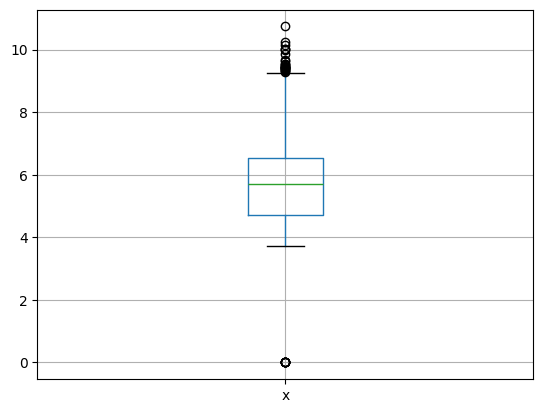

In [106]:
diamonds[["x"]].boxplot()

In [107]:
len(diamonds.query("x==0"))

8

sostituiamo gli zero nelle colonne x, y e z con dei null

In [108]:
diamonds = diamonds.replace(to_replace={'x':{0:np.nan}, 
                                        'y':{0:np.nan},
                                        'z':{0:np.nan}
                             })

ora sono presenti dei null

In [109]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53932 non-null  float64
 8   y        53933 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [110]:
features_training,features_test, target_training, target_test  = train_test_split(diamonds.drop("price",axis=1),
                                                                                   diamonds[["price"]],
                                                                                   test_size = 0.3,
                                                                                   shuffle = True,
                                                                                   random_state = 1)

Creiamo una pipeline standard con i passi
- simple imputer
- standard scaler
- regressione lineare

In [111]:
basic_pipeline = Pipeline([('si', SimpleImputer()),
                           ('st', StandardScaler()),
                           ('rg', LinearRegression())
                          ])

Alleniamo la pipeline

In [112]:
basic_pipeline.fit(features_training,target_training)

Pipeline(steps=[('si', SimpleImputer()), ('st', StandardScaler()),
                ('rg', LinearRegression())])

Vediamo le predizioni

In [113]:
predizioni = basic_pipeline.predict(features_test)
predizioni

array([[-761.054826  ],
       [6670.89949191],
       [3735.28640372],
       ...,
       [ 224.659066  ],
       [1568.25785906],
       [4225.6362373 ]], shape=(16182, 1))

Analizziamo lo score

In [114]:
basic_pipeline.score(features_test,target_test)

0.9090518474707515

Ricomponiamo il Dataset completo

In [115]:
diamonds_completo = features_test.copy()
diamonds_completo["prezzo_originale"]=target_test["price"]
diamonds_completo["prezzo_predetto"]=predizioni
diamonds_completo.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,prezzo_originale,prezzo_predetto
2714,0.33,5,3,5,61.7,55.0,4.43,4.46,2.74,564,-761.054826
14653,1.20,5,2,6,62.1,57.0,6.78,6.71,4.19,5914,6670.899492
52760,0.62,5,7,7,61.0,57.0,5.51,5.54,3.37,2562,3735.286404
48658,0.34,2,3,6,63.1,56.0,4.41,4.46,2.80,537,-627.724262
14812,1.20,5,6,4,62.5,55.0,6.77,6.84,4.25,5964,6990.900456
37498,0.53,4,6,4,62.2,57.0,5.20,5.16,3.22,984,984.845853
12456,1.08,5,7,4,60.2,57.0,6.63,6.67,4.00,5247,6271.139770
16738,0.41,4,4,4,61.4,58.0,4.75,4.80,2.93,611,-529.595352
21542,1.50,4,4,5,61.2,58.0,7.34,7.44,4.52,9645,9485.405304
40732,0.35,5,7,8,60.8,56.0,4.58,4.60,2.79,1162,2173.415451


## Clustering

In [116]:
from sklearn.cluster import KMeans

Citazione:Hind, Philip. Encyclopedia Titanica.

In [117]:
titanic=sns.load_dataset("titanic")

eliminiamo feature ridondanti e correlate

In [118]:
titanic = titanic.drop(["alive","pclass","embarked","deck","adult_male","sex","alone"],axis=1)

In [119]:
titanic.head()

,survived,age,sibsp,parch,fare,class,who,embark_town
0,0,22.0,1,0,7.2500,Third,man,Southampton
1,1,38.0,1,0,71.2833,First,woman,Cherbourg
2,1,26.0,0,0,7.9250,Third,woman,Southampton
3,1,35.0,1,0,53.1000,First,woman,Southampton
4,0,35.0,0,0,8.0500,Third,man,Southampton


Decodifichiamo le variabili non quantitative

In [120]:
codifica_class = {"First":1, "Second":2, "Third":3}
titanic["class"] = titanic["class"].map(codifica_class).astype("int64")

In [121]:
titanic_2 = pd.get_dummies(data=titanic, dtype=int)
titanic_2.head(5)

,survived,age,sibsp,parch,fare,class,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,3,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,3,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,3,0,1,0,0,0,1


Valorizziamo i null

In [122]:
imputer = SimpleImputer(strategy='mean')

In [123]:
imputer.fit(titanic_2)

SimpleImputer()

In [124]:
titanic_2_imputed = pd.DataFrame(
    imputer.transform(titanic_2),
    columns=titanic_2.columns,
    index=titanic_2.index
)

Istanziamo l'algoritmo Kmeans di Scikit-learn

In [125]:
km = KMeans (n_clusters = 2,
             n_init = 5,
             random_state = 0)

Eseguiamo il fit e predict su tutti i dati tranne survived

In [126]:
cluster = km.fit_predict(titanic_2_imputed.drop("survived",axis=1))
cluster[:5]

array([0, 0, 0, 0, 0], dtype=int32)

Creiamo la colonna "cluster"

In [127]:
titanic["cluster"] = cluster

In [128]:
titanic.head(10)

,survived,age,sibsp,parch,fare,class,who,embark_town,cluster
0,0,22.0,1,0,7.2500,3,man,Southampton,0
1,1,38.0,1,0,71.2833,1,woman,Cherbourg,0
2,1,26.0,0,0,7.9250,3,woman,Southampton,0
3,1,35.0,1,0,53.1000,1,woman,Southampton,0
4,0,35.0,0,0,8.0500,3,man,Southampton,0
5,0,NaN,0,0,8.4583,3,man,Queenstown,0
6,0,54.0,0,0,51.8625,1,man,Southampton,0
7,0,2.0,3,1,21.0750,3,child,Southampton,0
8,1,27.0,0,2,11.1333,3,woman,Southampton,0
9,1,14.0,1,0,30.0708,2,child,Cherbourg,0


In questo caso i due cluster non sembrano corrispondere con la suddivisione tra survived e non survived.

Tuttavia la suddivisione in clustered ha senso compiuto anche se non applicata ad un problema di classificazione